In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Problem Statement

# Data Gathering

In [3]:
df=pd.read_csv("loan_data.csv")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<AxesSubplot:>

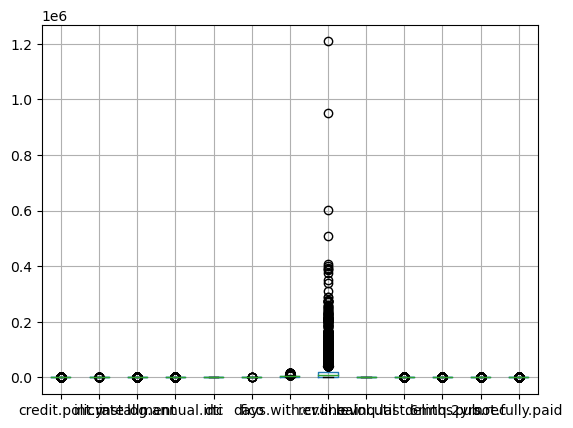

In [6]:
df.boxplot()

# Feature Engineering

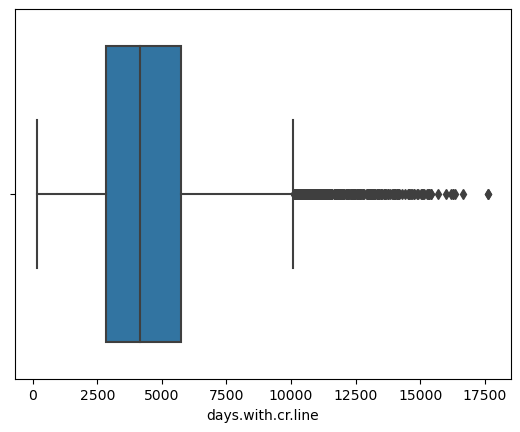

In [7]:
sns.boxplot(df['days.with.cr.line'])
plt.show()

In [8]:
q1=df["days.with.cr.line"].quantile(0.25)
q2=df['days.with.cr.line'].quantile(0.50)
q3=df['days.with.cr.line'].quantile(0.75)
median=df['days.with.cr.line'].median()
IQR=q3-q1
upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR
print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)
print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 2820.0
Q2 : 4139.958333
Q3 : 5730.0
Median : 4139.958333
upper_tail : 10095.0
lower_tail : -1545.0


In [9]:
df['days.with.cr.line'].loc[df['days.with.cr.line']> upper_tail]=upper_tail

In [10]:
df[['days.with.cr.line']].loc[df['days.with.cr.line']> upper_tail]

,days.with.cr.line


In [11]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [12]:
df = pd.get_dummies(df, columns=['purpose'])
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10095.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


## Checking Assumptions

In [15]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.107183,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.127300,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.194380,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.358902,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.066075,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.267965,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.107183,-0.127300,0.194380,0.358902,0.066075,0.267965,1.000000,0.235694,-0.017003,-0.043899,0.085715,0.078789,-0.029747
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.235694,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.017003,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.043899,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


### VIF

In [16]:
numerics=['int32','int64','float32','float64']
new_df=df.select_dtypes(include=numerics)
new_df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10095.000000,215372,82.1,2,0,0,1
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


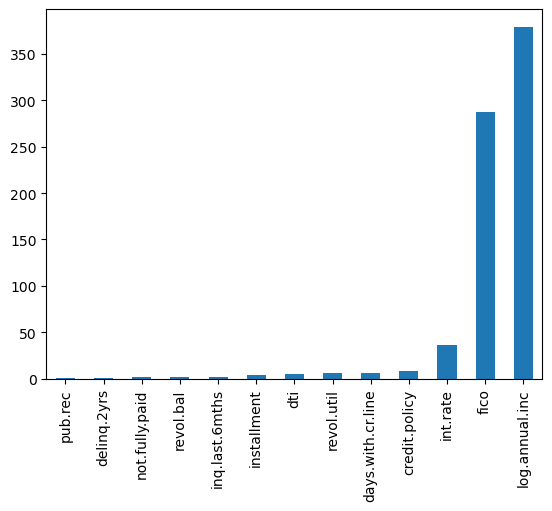

In [24]:
vif_lst = []
for i in range(new_df.shape[1]):
    #print(i)
    vif = variance_inflation_factor(new_df,i) 
    vif_lst.append(vif)
    
    
seri = pd.Series(vif_lst,index = new_df.columns)
seri.sort_values().plot(kind='bar')
plt.show()

# Model Building

In [13]:
x = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10, stratify=y)


# Model Training

In [14]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

# Model Evaluation

In [15]:
# testing Accuracy
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)



accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[2008    4]
 [ 375    8]]
*********************************************
Accuracy:  0.8417536534446765
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2012
           1       0.67      0.02      0.04       383

    accuracy                           0.84      2395
   macro avg       0.75      0.51      0.48      2395
weighted avg       0.81      0.84      0.77      2395



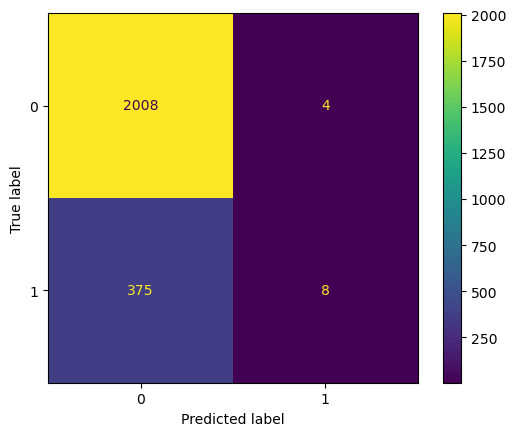

In [16]:
plot_confusion_matrix(logistic_model, x_test, y_test)
plt.show()

In [17]:
# Training Accuracy
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[6013   20]
 [1140   10]]
*********************************************
Accuracy:  0.8385075873590422
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6033
           1       0.33      0.01      0.02      1150

    accuracy                           0.84      7183
   macro avg       0.59      0.50      0.46      7183
weighted avg       0.76      0.84      0.77      7183



## AUC-ROC Curve¶

In [18]:
y_pred_prob = logistic_model.predict_proba(x_train)   # Plot AUC- ROC curve on Training data
y_pred_prob[:,1]


fpr, tpr, thresh = roc_curve(y_train, y_pred_prob[:,1])

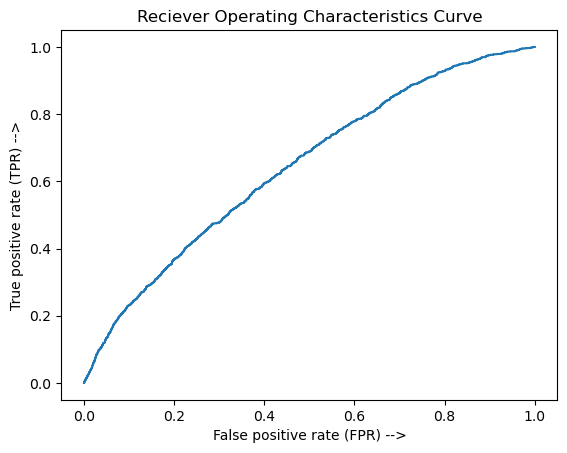

In [19]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FPR) -->")
plt.ylabel("True positive rate (TPR) -->")
plt.title("Reciever Operating Characteristics Curve")
plt.show()

In [20]:
auc_value = auc(fpr, tpr)
auc_value

0.6424834425154404

In [21]:
column_names = x.columns
len(column_names)

19

In [23]:
import pickle
with open("Loan_model.pkl", "wb") as f:
    pickle.dump(logistic_model,f)
    

In [24]:
json_data={"columns":list(column_names)}
json_data

{'columns': ['credit.policy',
  'int.rate',
  'installment',
  'log.annual.inc',
  'dti',
  'fico',
  'days.with.cr.line',
  'revol.bal',
  'revol.util',
  'inq.last.6mths',
  'delinq.2yrs',
  'pub.rec',
  'purpose_all_other',
  'purpose_credit_card',
  'purpose_debt_consolidation',
  'purpose_educational',
  'purpose_home_improvement',
  'purpose_major_purchase',
  'purpose_small_business']}

In [25]:
import json
with open("Project_data_loan.json", "w") as f:
    json.dump(json_data, f)

# Single user input testing

In [28]:
x_test.iloc[6]

credit.policy                    1.000000
int.rate                         0.089400
installment                    190.630000
log.annual.inc                  11.002100
dti                              2.860000
fico                           757.000000
days.with.cr.line             4830.041667
revol.bal                     7392.000000
revol.util                      42.500000
inq.last.6mths                   0.000000
delinq.2yrs                      0.000000
pub.rec                          0.000000
purpose_all_other                0.000000
purpose_credit_card              0.000000
purpose_debt_consolidation       1.000000
purpose_educational              0.000000
purpose_home_improvement         0.000000
purpose_major_purchase           0.000000
purpose_small_business           0.000000
Name: 6479, dtype: float64

In [33]:
credit_policy=1
int_rate=0.089400
installment=190.630000
log_annual_inc=11.002100
dti=2.860000
fico =757
days_with_cr_line=4830.041667
revol_bal =7392
revol_util =42.500000
inq_last_6mths =0
delinq_2yrs = 0
pub_rec=0
purpose="debt_consolidation"


purpose="purpose_" + purpose
#purpose

In [34]:
purpose_index=list(column_names).index(purpose)
purpose_index

14

In [37]:
test_array = np.zeros(len(column_names))

test_array[0] = credit_policy
test_array[1] = int_rate
test_array[2] = installment
test_array[3] = log_annual_inc
test_array[4] = dti
test_array[5] = fico
test_array[6] = days_with_cr_line
test_array[7] = revol_bal
test_array[8] = revol_util
test_array[9]= inq_last_6mths
test_array[10]= delinq_2yrs
test_array[11]= pub_rec
test_array[purpose_index] = 1


test_array


array([1.00000000e+00, 8.94000000e-02, 1.90630000e+02, 1.10021000e+01,
       2.86000000e+00, 7.57000000e+02, 4.83004167e+03, 7.39200000e+03,
       4.25000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [39]:
prediction = logistic_model.predict([test_array])[0]
prediction
if prediction==0:
    print("Loan is not approve")
else:
    print("Loan is Approved")

Loan is not approve
